## 1. 데이터 수집

#### 패키지 불러오기

In [2]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

#### 크롤링 테스트

In [6]:
url = "https://movie.naver.com/movie/bi/mi/point.nhn?code=194205"
response = requests.get(url)
if response.status_code == 200:
    html = response.text
    soup = bs(html, "html.parser")
    print('Done')
else:
    print(response.status_code)

Done


In [7]:
soup.select('#_filtered_ment_0')

[]

네이버 영화를 통해서 접속할 수 있는 사이트에서는 리뷰 크롤링이 되지 않았습니다.

확인해 본 결과 네이버 영화 페이지는 iframe태그로 리뷰를 가지고 있었습니다.

따라서 iframe의 scr속성에 있는 링크를 이용해 해당 html페이지로 접속을 해주어야 합니다.

링크 : https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=194205&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=1

In [8]:
url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=194205&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=1'
response = requests.get(url)
if response.status_code == 200:
    html = response.text
    soup = bs(html, "html.parser")
    print('Done')
else:
    print(response.status_code)

Done


In [9]:
soup.select("#_filtered_ment_0")

[<span id="_filtered_ment_0">
 														
 															
 															
 																한시간 반짜리 제네시스 광고 + 조우진 연기 하드캐리 
 															
 														
 														
 													</span>]

In [11]:
soup.select('body > div > div > div.score_result > ul > li:nth-of-type(5) > div.score_reple > p > span.ico_viewer')

[<span class="ico_viewer">관람객</span>]

이상 없이 원하는 데이터들이 수집되는 것을 확인했으니 모든 리뷰들의 데이터를 수집하겠습니다.

#### 크롤링

In [36]:
category_list = []
text_list = []

In [37]:
page = 1
base_url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=194205&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page='
while page <= 174:
    if page%10 == 0:
        print("Doing {}th Page".format(page))
    
    url = base_url+str(page)
    response = requests.get(url)
    if response.status_code == 200:
        html = response.text
        soup = bs(html, "html.parser")
    else:
        print(response.status_code)
        break
        
    for j in range(0,10):
        if soup.select('body > div > div > div.score_result > ul > li:nth-of-type({})'.format(j+1)) == []:
            break
            
        try:
            soup.select('body > div > div > div.score_result > ul > li:nth-of-type({}) > div.score_reple > p > span.ico_viewer'.format(j+1))
            category = '관람객'
        except:
            category = '비관람객'        
        text = soup.select("#_filtered_ment_{}".format(j))[0].text.strip()
    
        category_list.append(category)
        text_list.append(text)
    
    page += 1

Doing 10th Page
Doing 20th Page
Doing 30th Page
Doing 40th Page
Doing 50th Page
Doing 60th Page
Doing 70th Page
Doing 80th Page
Doing 90th Page
Doing 100th Page
Doing 110th Page
Doing 120th Page
Doing 130th Page
Doing 140th Page
Doing 150th Page
Doing 160th Page
Doing 170th Page


In [38]:
len(category_list), len(text_list)

(1739, 1739)

In [39]:
review_df = pd.DataFrame({
    'category':category_list,
    'text':text_list
})
review_df.tail()

,category,text
1734,관람객,스릴있고 재밋게봤습니다^^
1735,관람객,발신제한 NO! 흥행제한 YES!
1736,관람객,지창욱 범인인거 보면 눈치채고긴장감은 없지만 예상되는 스토리조우진 앞으로 더 기대됩니다
1737,관람객,괜찮케 네 고객님 알겠습니다 고객님 안녕하세요 고객님 안녕하세요 고객님 안녕하세요 ...
1738,관람객,조우진이 주연인게 말이되냐?


#### 데이터 저장하기

In [40]:
review_df.to_csv("발신제한_리뷰데이터.csv", index=False)

## 2. 데이터 분석

In [1]:
import pandas as pd
from konlpy.tag import *

In [2]:
# 데이터 불러오기
review_df = pd.read_csv("발신제한_리뷰데이터.csv")
review_df.tail()

,category,text
1734,관람객,스릴있고 재밋게봤습니다^^
1735,관람객,발신제한 NO! 흥행제한 YES!
1736,관람객,지창욱 범인인거 보면 눈치채고긴장감은 없지만 예상되는 스토리조우진 앞으로 더 기대됩니다
1737,관람객,괜찮케 네 고객님 알겠습니다 고객님 안녕하세요 고객님 안녕하세요 고객님 안녕하세요 ...
1738,관람객,조우진이 주연인게 말이되냐?


In [3]:
# 텍스트만 따로 저장
sents = list(review_df['text'])
sents[:5]

['한시간 반짜리 제네시스 광고 + 조우진 연기 하드캐리',
 '조우진 하드캐리 + 음악 되게 잘쓴듯',
 '조우진은 연기 미쳤다.. 재밌음 심장 털리는줄 ㅋㅋ',
 '음… 스토리보다는 조우진의 연기가 더 독보이는 영화였다.. 연기는 진짜 최고인듯… 스토리는 살짝 뻔하고 가족애로 약간씩 울컥하게 하는 정도…..',
 '이야기(서사)가 좀 더 있었으면 싶지만, 조우진ㆍ지창욱 연기는 진짜 압도적! 볼만한 오락영화!!!!']

In [4]:
# tokenizer 정의
komoran = Komoran()
def komoran_tokenize(sent):
    words = komoran.pos(sent, join=True)
    words = [w for w in words if('/NN' in w or '/XR' in w or '/VA' in w or '/VV' in w)]
    return words

In [5]:
from textrank import KeywordSummarizer

keyword_extractor = KeywordSummarizer(
    tokenize = komoran_tokenize,
    window = -1,
    verbose =False
)

keywords = keyword_extractor.summarize(sents, topk=30)

AttributeError: 'float' object has no attribute 'split'

- 특정 문장에서 코모란 토크나이저 오류가 발생하는 것을 확인했습니다. 어떤 문장인지 직접 살펴보겠습니다.

In [6]:
for sent in sents:
    try:
        words = komoran_tokenize(sent)
    except:
        print(sent)
        break

nan


- 수집한 데이터에 nan값이 껴있어서 오류가 났습니다. nan값들은 제거해주고 다시 진행하겠습니다.

In [7]:
sents = list(pd.DataFrame(sents).dropna()[0])

In [25]:
keywords = keyword_extractor.summarize(sents, topk=100)

In [26]:
keywords[:30]

[('보/VV', 46.224143536607166),
 ('영화/NNG', 38.67945783101341),
 ('조우진/NNP', 31.10022255099017),
 ('연기/NNG', 26.26367951692898),
 ('좋/VA', 19.965623231421038),
 ('하/VV', 18.59081676106777),
 ('스토리/NNP', 18.27898312770983),
 ('있/VV', 15.993313641006711),
 ('없/VA', 14.960588340784094),
 ('연기/NNP', 14.537624044675336),
 ('배우/NNP', 13.380811931024486),
 ('배우/NNG', 12.432583961216183),
 ('영화/NNP', 9.891433100031684),
 ('제네시스/NNP', 9.111087299894061),
 ('재밌/VA', 8.947290174945293),
 ('나오/VV', 8.576460699356547),
 ('같/VA', 8.464368328049584),
 ('것/NNB', 8.399799380198507),
 ('지창욱/NNP', 8.222001397520966),
 ('거/NNB', 8.04462489139051),
 ('뻔하/VA', 7.818974006553121),
 ('긴장감/NNG', 7.739217193785973),
 ('연기력/NNG', 7.372414669226934),
 ('가/VV', 7.201461715228843),
 ('광고/NNG', 7.012894775745191),
 ('수/NNB', 6.99044323041573),
 ('감동/NNG', 6.655894131366968),
 ('되/VV', 6.51014113791106),
 ('내용/NNG', 6.245444443341377),
 ('몰입/NNP', 6.131103731037829)]

#### 키워드 시각화

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [27]:
rank_dict = {}
for key, value in keywords:
    rank_dict[key.split("/")[0]] = value

In [28]:
wordcloud = WordCloud(font_path="font/NanumGothic.ttf", background_color="white").generate_from_frequencies(rank_dict)

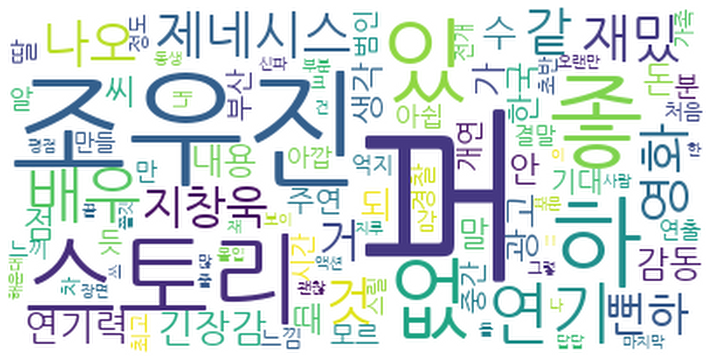

In [29]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis("off")
plt.tight_layout()
plt.show()

핵심 단어들로 "조우진", "스토리", "제네시스" 등이 나온 것을 볼 수 있습니다.

하지만 이것만으로는 조우진 배우가 어쨌다는 건지, 스토리는 어떻다는 건지 알 수가 없습니다.

따라서 N-그램 방식의 문장 분해와 조건부 확률을 이용해 핵심 키워드들이 어떤 단어와 주로 등장하는지를 살펴 문맥을 이해해보겠습니다.

#### 바이그램 문장분해

In [30]:
from nltk.util import ngrams

In [95]:
komoran = Komoran()
def komoran_tokenize(sent):
    words = komoran.pos(sent, join=True)
    words = [w.split("/")[0] for w in words if('/NN' in w or '/XR' in w or '/VA' in w or '/VV' in w)]
    return words

In [96]:
sentences = []
for sent in sents:
    tokens = komoran_tokenize(sent)
    bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")
    sentences += [t for t in bigram]

In [97]:
sentences[:9] # 첫 번째 리뷰의 바이그램 토큰화

[('SS', '시간'),
 ('시간', '반'),
 ('반', '제네시스'),
 ('제네시스', '광고'),
 ('광고', '조우진'),
 ('조우진', '연기'),
 ('연기', '하드'),
 ('하드', '캐리'),
 ('캐리', 'SE')]

#### 키워드와 함께 자주 출현하는 단어들 파악

In [98]:
from nltk import ConditionalFreqDist

cfd = ConditionalFreqDist(sentences)

In [132]:
cfd["조우진"].most_common(10)

[('연기', 177),
 ('배우', 124),
 ('지창욱', 22),
 ('연기력', 19),
 ('씨', 15),
 ('주연', 15),
 ('SE', 8),
 ('하드', 4),
 ('이재인', 4),
 ('때문', 4)]

In [133]:
cfd["제네시스"].most_common(10)

[('광고', 77),
 ('80', 11),
 ('조우진', 7),
 ('SE', 6),
 ('홍보', 4),
 ('멋있', 3),
 ('보이', 3),
 ('사', 3),
 ('구경', 2),
 ('이쁘', 2)]

In [134]:
cfd["스토리"].most_common(10)

[('SE', 18),
 ('뻔하', 16),
 ('개연', 10),
 ('아쉽', 9),
 ('전개', 6),
 ('조우진', 5),
 ('연출', 5),
 ('좋', 5),
 ('진부', 5),
 ('억지', 4)]

## 결론

핵심 키워드 및 그 후 문맥을 통해 살펴본 결과 영화 발신제한은 3가지로 요약할 수 있을 것 같습니다.

1. 조우진 배우의 연기
2. 제네시스 광고
3. 뻔하고 아쉬운 스토리

아무리 배우의 연기가 뛰어나더라도 다음 내용이 예상되는 뻔한 스토리를 1시간30분의 런닝타임동안 지켜보고 있는 것은 꽤나 지루한 일이라고 생각됩니다.

저는 영화 발신제한을 돈 주고 보는 것은 시간이 아깝다는 판단을 내리겠습니다.